<h1> Bài 1: Bài tập thêm

<h2><srong>K-Meldoid</strong></h2>

<p>Link tham khảo: https://towardsdatascience.com/k-medoid-clustering-pam-algorithm-in-python-with-solved-example-c0dcb35b3f46

<h3>Import thư viện cần thiết

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids


In [17]:
# — — — — — — -Assigning Initial Centers — — — — — — — — — — — -
centers = [[4, 5], [9, 10]]

In [18]:
# — — — — — — -Assigning Data: Dummy Data used in example above — — — — — — — — — — — — — — — — — — 
df=np.array([[7,8], [9,10], [11,5], [4,9], [7,5], [2,3], [4,5]])

In [19]:
# — — — — — — -Fit KMedoids clustering — — — — — — — — — — — -
KMobj = KMedoids(n_clusters=2).fit(df)

In [20]:
# — — — — — — -Assigning Cluster Labels — — — — — — — — — — — -
labels = KMobj.labels_

In [21]:
# — — — — — — -Extracting Unique Labels — — — — — — — — — — — -
unq_lab = set(labels)
# — — — — — — -Setting Up Color Codes — — — — — — — — — — — -
colors_plot = [
 plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))
]
for k, col in zip(unq_lab, colors_plot):
    class_member_mask = labels == k
 
 # — — — — — — -Setting datapoint Feature X and Feature Y — — — — — — — — — — — -
    xy = df[class_member_mask]

Text(0.5, 1.0, 'KMedoids clustering on Dummy Data- Medoids are represented in Orange.')

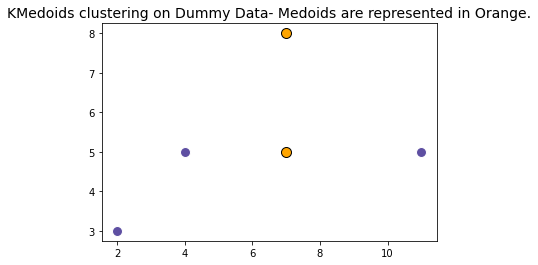

In [22]:
plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="white",
    markersize=10,
 )
# — — — — — — -Annotate Centroids — — — — — — — — — — — -
plt.plot(
    KMobj.cluster_centers_[:, 0],
    KMobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="orange",
    markeredgecolor="k",
    markersize=10,
)
# — — — — — — -Add title to the plot — — — — — — — — — — — -
plt.title("KMedoids clustering on Dummy Data- Medoids are represented in Orange.", fontsize=14)

<h2><srong>Kohonen</strong></h2>

<p>Link tham khảo: https://pypi.org/project/sklearn-som/

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

In [24]:
# Load iris data
iris = datasets.load_iris()
iris_data = iris.data
iris_label = iris.target

In [25]:
# Extract just two features (just for ease of visualization)
iris_data = iris_data[:, :2]


In [26]:
# Build a 3x1 SOM (3 clusters)
som = SOM(m=3, n=1, dim=2, random_state=1234)

In [27]:
# Fit it to the data
som.fit(iris_data)

In [28]:
# Assign each datapoint to its predicted cluster
predictions = som.predict(iris_data)

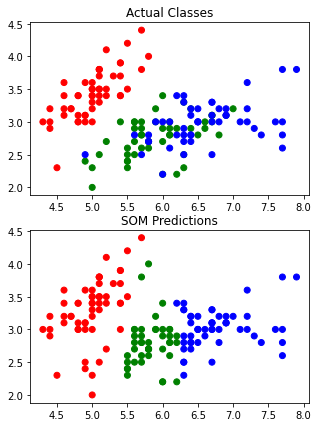

In [29]:
# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x = iris_data[:,0]
y = iris_data[:,1]
colors = ['red', 'green', 'blue']

ax[0].scatter(x, y, c=iris_label, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')
plt.savefig('iris_example.png')

<h2><srong>K++</strong></h2>

<p>Link tham khảo: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_plusplus.html#sphx-glr-auto-examples-cluster-plot-kmeans-plusplus-py

In [30]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [31]:
n_samples = 4000
n_components = 4

In [32]:
X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

In [33]:
# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

In [34]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

<Figure size 432x288 with 0 Axes>

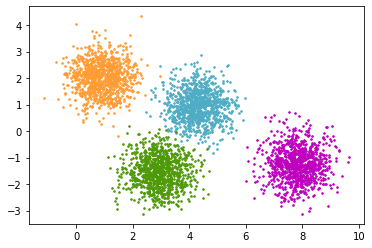

In [35]:
for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

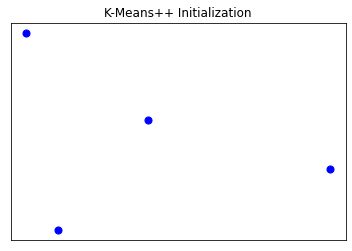

In [36]:
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()